<h1>Web Scraping de estatísticas do futebol brasileiro</h1>
<br>
Extraírei estatísticas grupais dos goleiros do campeonato brasileiro de 2020 no site do fbref, ou seja, análisarei os grupos de goleiros de cada time, para descobrir algo relacionado aos times. Detalhe: Dados carregados até a rodada 27.
<br>
Logo após, farei uma análise exploratória dos dados. 

<h1>Primeiro de tudo, o que é Web Scraping?</h1>
<br>
<b>Web Scraping é uma forma de mineração que permite a extração de dados de sites da web convertendo-os em informação estruturada.</b>
<br>
<br>
Para fazer essa extração de dados via Python, será necessário importar algumas bibliotecas. A biblioteca requests torna as solicitações HTTP mais simples.
<br>
<br>
A biblioteca BeautifulSoup transforma dados HTML em XML, e com isso, consegue ser lido pelo Python.

<h1>Bibliotecas</h1>
<br>

In [1]:
# Importando bibliotecas
%matplotlib inline
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Utilizando o método get para obter o conteúdo da página
url = ' https://fbref.com/pt/comps/24/keepers/Serie-A-Estatisticas#stats_keeper::none'
req = requests.get(url)

In [3]:
# Verificando se a requisição foi bem sucedida.
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content # obtém conteúdo da página

Requisição bem sucedida!


In [4]:
soup = BeautifulSoup(content, 'html.parser')

In [5]:
# Título da página
soup.title

<title>Série A Estatísticas de goleiro | FBref.com</title>

In [6]:
# Encontrando a tabela da página
table = soup.find(name='table')

In [7]:
table

<table class="min_width sortable stats_table" data-cols-to-freeze="1" id="stats_keeper_squads"><caption>Defesas de Grupo <span style="color: #777; font-size:smaller">2020 Série A</span> Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr class="over_header">
<th aria-label="" class="over_header center" colspan="2" data-stat=""></th>
<th aria-label="" class="over_header center group_start" colspan="4" data-stat="header_playing">Tempo de jogo</th>
<th aria-label="" class="over_header center group_start" colspan="10" data-stat="header_performance">Desempenho</th>
<th aria-label="" class="over_header center group_start" colspan="4" data-stat="header_pk">Penaltis</th>
</tr>
<tr>
<th aria-label="Equipe" class="poptip sort_default_asc center" data-stat="squad" scope="col">Equipe</th>
<th aria-label="Número de jogadores utilizados em jogos" class="poptip center" data-stat="play

In [8]:
# Transformando em string
table_str = str(table)

In [9]:
# Transformando em DataFrame
df = pd.read_html(table_str)[0]
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Tempo de jogo                       \
                Equipe                # J            MP Inícios   Min.   90s   
0    vs Atl Goianiense                  2            27      27  2.428  27.0   
1    vs Atl Paranaense                  3            27      27  2.430  27.0   
2  vs Atlético Mineiro                  3            27      27  2.430  27.0   
3             vs Bahia                  3            27      27  2.430  27.0   
4     vs Botafogo (RJ)                  3            27      27  2.430  27.0   

  Desempenho                                                 Penaltis          \
          GC GC90 CaGC Defesas %Defesas   V   E   D  SV  %SV       PT GPC Psv   
0         25   93  106      83      783   9  10   8  10  370        2   2   0   
1         24   89  103      79      767  13   4  10   9  333        1   0   0   
2         46  170  146     109      726   8   4  15   5  185        9   6   3   
3         34  126  118      89      746  15   4   8   8  296        6   4   2   
4         25   93   98      77      786  12  11   4   9  333        5   4   0   

       
  GPp  
0   0  
1   1  
2   0  
3   0  
4   1

<h1>Limpeza dos dados</h1>
<br>

<b>Primeiro vou excluir as primeiras 20 linhas que são referentes a visão de oponentes. Gostaria de ter apenas a visão interna de cada time, ou seja, se o time Bahia possui 8 vitórias e 15 derrotas, será visto desta forma e não contrário, conforme visto na tabela acima.</b>

In [10]:
df1 = df.iloc[20:40]
df1.head(20)

Unnamed: 0_level_0 Unnamed: 1_level_0 Tempo de jogo                       \
               Equipe                # J            MP Inícios   Min.   90s   
20     Atl Goianiense                  2            27      27  2.430  27.0   
21     Atl Paranaense                  3            27      27  2.430  27.0   
22   Atlético Mineiro                  3            27      27  2.427  27.0   
23              Bahia                  3            27      27  2.430  27.0   
24      Botafogo (RJ)                  3            27      27  2.430  27.0   
25         Bragantino                  2            27      27  2.430  27.0   
26              Ceará                  2            27      27  2.430  27.0   
27        Corinthians                  2            27      27  2.429  27.0   
28           Coritiba                  1            27      27  2.430  27.0   
29           Flamengo                  4            26      26  2.338  26.0   
30         Fluminense                  2            27      27  2.430  27.0   
31          Fortaleza                  2            27      27  2.430  27.0   
32              Goiás                  2            27      27  2.430  27.0   
33             Grêmio                  2            26      26  2.340  26.0   
34      Internacional                  2            27      27  2.430  27.0   
35          Palmeiras                  2            26      26  2.340  26.0   
36             Santos                  3            27      27  2.430  27.0   
37          São Paulo                  1            27      27  2.430  27.0   
38       Sport Recife                  2            27      27  2.430  27.0   
39      Vasco da Gama                  2            26      26  2.340  26.0   

   Desempenho                                                 Penaltis      \
           GC GC90 CaGC Defesas %Defesas   V   E   D  SV  %SV       PT GPC   
20         33  122  102      74      716   8  10   9   7  259        5   4   
21         29  107  107      84      757  10   4  13   9  333        6   3   
22         35  130  107      72      682  15   4   8   9  333        1   1   
23         48  178  115      72      626   8   4  15   3  111        5   5   
24         39  144  121      90      719   4  11  12   4  148       10   5   
25         31  115   97      69      701   7  10  10   6  222        4   2   
26         38  141  121      89      736   9   9   9   8  296        7   6   
27         30  111  122      96      787  10   9   8  10  370        5   4   
28         37  137  118      90      746   5   6  16   6  222        9   7   
29         36  139  105      71      676  14   7   5   5  192        2   2   
30         31  115   92      65      707  11   7   9   5  185        4   4   
31         25   93  107      85      785   7  10  10  10  370        5   2   
32         42  156  142     104      725   5   8  14   7  259        4   3   
33         22   85   75      57      773  11  12   3   9  346        5   5   
34         26   96   68      45      662  13   8   6  10  370        3   3   
35         25   96   92      69      761  12   8   6   9  346        3   3   
36         35  130  110      80      727  10   9   8   4  148        5   5   
37         23   85   93      73      753  16   8   3  10  370        5   0   
38         36  133  127      96      756   8   5  14   6  222        5   5   
39         39  150  116      87      724   7   7  12   7  269       11   7   

            
   Psv GPp  
20   1   0  
21   3   0  
22   0   0  
23   0   0  
24   3   2  
25   1   1  
26   0   1  
27   0   1  
28   2   0  
29   0   0  
30   0   0  
31   2   1  
32   1   0  
33   0   0  
34   0   0  
35   0   0  
36   0   0  
37   3   2  
38   0   0  
39   4   0

<b>Esta tabela possui multi colunas, o que não será muito interessante para a análise na parte de <b>desempenho</b>, pois ficará mais complicado. Como o primeiro nível de coluna não será importante estar explícito, droparei ela.
<br>
Para a análise de Penaltis, usarei o primeiro DataFrame com multi colunas.</b>

In [11]:
# Dropando o primeiro nível de coluna(Tempo de Jogo, Desempenho e Penaltis)
df1.columns = df1.columns.droplevel(0)
df1.head()

,Equipe,# J,MP,Inícios,Min.,90s,GC,GC90,CaGC,Defesas,%Defesas,V,E,D,SV,%SV,PT,GPC,Psv,GPp
20,Atl Goianiense,2,27,27,2.430,27.0,33,122,102,74,716,8,10,9,7,259,5,4,1,0
21,Atl Paranaense,3,27,27,2.430,27.0,29,107,107,84,757,10,4,13,9,333,6,3,3,0
22,Atlético Mineiro,3,27,27,2.427,27.0,35,130,107,72,682,15,4,8,9,333,1,1,0,0
23,Bahia,3,27,27,2.430,27.0,48,178,115,72,626,8,4,15,3,111,5,5,0,0
24,Botafogo (RJ),3,27,27,2.430,27.0,39,144,121,90,719,4,11,12,4,148,10,5,3,2


<h1>Análise exploratória dos dados</h1>
<br>
Depois de transformado em DataFrame, farei algumas análises relacionado a desempenho e penaltis.

Para entender melhor cada coluna, será colocado o glossário disponibilzado pelo próprio site:
<br>
<br>
#J -- Número de jogadores utilizados em jogos
<br>
<br>
<b>Tempo de jogo</b>
<br>
<br>
MP -- Jogos Disputados
<br>
Jogos disputados pelo jogador ou grupo
<br>
Inícios -- Inícios
<br>
Jogo ou jogos jogado(s) pelo jogador
<br>
Min. -- Minutos
<br>
90s -- 90s played - Minutos jogados dividido por 90
<br>
<br>
<b>Desempenho</b>
<br>
<br>
GC -- Gols contra
<br>
GC90 -- Gols contra a cada 90 minutos
<br>
CaGC -- Chutes a gol contra
<br>
%Defesas -- Porcentagem de defesas
<br>
(Chutes a gol contra - Gols contra)Chutes a gol contra
<br>
Note que nem todos os chutes a gol são defendidos pelo goleiro, muitos são defendidos pelos zagueiros
<br>
V -- Vitórias
<br>
E -- Empates
<br>
D -- Derrotas
<br>
SV -- Sem vazamento - Partidas completas pelo goleiro onde nenhum gol foi sofrido.
<br>
%SV -- Porcentagem sem vazamento - Porcentagem de partidas que resultam em nenhum vazamento
<br>
<br>
<b>Penaltis</b>
<br>
<br>
PT -- Pênaltis tentados
<br>
GPC -- Gols de Penalti convertidos
<br>
Psv -- Chutes de Penalti Salvos
<br>
GPp -- Gols de Penalti perdidos

<h1>Análise dos Penaltis</h1>
<br>

In [12]:
df2 = df.iloc[20:40]
df2.head(20)

Unnamed: 0_level_0 Unnamed: 1_level_0 Tempo de jogo                       \
               Equipe                # J            MP Inícios   Min.   90s   
20     Atl Goianiense                  2            27      27  2.430  27.0   
21     Atl Paranaense                  3            27      27  2.430  27.0   
22   Atlético Mineiro                  3            27      27  2.427  27.0   
23              Bahia                  3            27      27  2.430  27.0   
24      Botafogo (RJ)                  3            27      27  2.430  27.0   
25         Bragantino                  2            27      27  2.430  27.0   
26              Ceará                  2            27      27  2.430  27.0   
27        Corinthians                  2            27      27  2.429  27.0   
28           Coritiba                  1            27      27  2.430  27.0   
29           Flamengo                  4            26      26  2.338  26.0   
30         Fluminense                  2            27      27  2.430  27.0   
31          Fortaleza                  2            27      27  2.430  27.0   
32              Goiás                  2            27      27  2.430  27.0   
33             Grêmio                  2            26      26  2.340  26.0   
34      Internacional                  2            27      27  2.430  27.0   
35          Palmeiras                  2            26      26  2.340  26.0   
36             Santos                  3            27      27  2.430  27.0   
37          São Paulo                  1            27      27  2.430  27.0   
38       Sport Recife                  2            27      27  2.430  27.0   
39      Vasco da Gama                  2            26      26  2.340  26.0   

   Desempenho                                                 Penaltis      \
           GC GC90 CaGC Defesas %Defesas   V   E   D  SV  %SV       PT GPC   
20         33  122  102      74      716   8  10   9   7  259        5   4   
21         29  107  107      84      757  10   4  13   9  333        6   3   
22         35  130  107      72      682  15   4   8   9  333        1   1   
23         48  178  115      72      626   8   4  15   3  111        5   5   
24         39  144  121      90      719   4  11  12   4  148       10   5   
25         31  115   97      69      701   7  10  10   6  222        4   2   
26         38  141  121      89      736   9   9   9   8  296        7   6   
27         30  111  122      96      787  10   9   8  10  370        5   4   
28         37  137  118      90      746   5   6  16   6  222        9   7   
29         36  139  105      71      676  14   7   5   5  192        2   2   
30         31  115   92      65      707  11   7   9   5  185        4   4   
31         25   93  107      85      785   7  10  10  10  370        5   2   
32         42  156  142     104      725   5   8  14   7  259        4   3   
33         22   85   75      57      773  11  12   3   9  346        5   5   
34         26   96   68      45      662  13   8   6  10  370        3   3   
35         25   96   92      69      761  12   8   6   9  346        3   3   
36         35  130  110      80      727  10   9   8   4  148        5   5   
37         23   85   93      73      753  16   8   3  10  370        5   0   
38         36  133  127      96      756   8   5  14   6  222        5   5   
39         39  150  116      87      724   7   7  12   7  269       11   7   

            
   Psv GPp  
20   1   0  
21   3   0  
22   0   0  
23   0   0  
24   3   2  
25   1   1  
26   0   1  
27   0   1  
28   2   0  
29   0   0  
30   0   0  
31   2   1  
32   1   0  
33   0   0  
34   0   0  
35   0   0  
36   0   0  
37   3   2  
38   0   0  
39   4   0

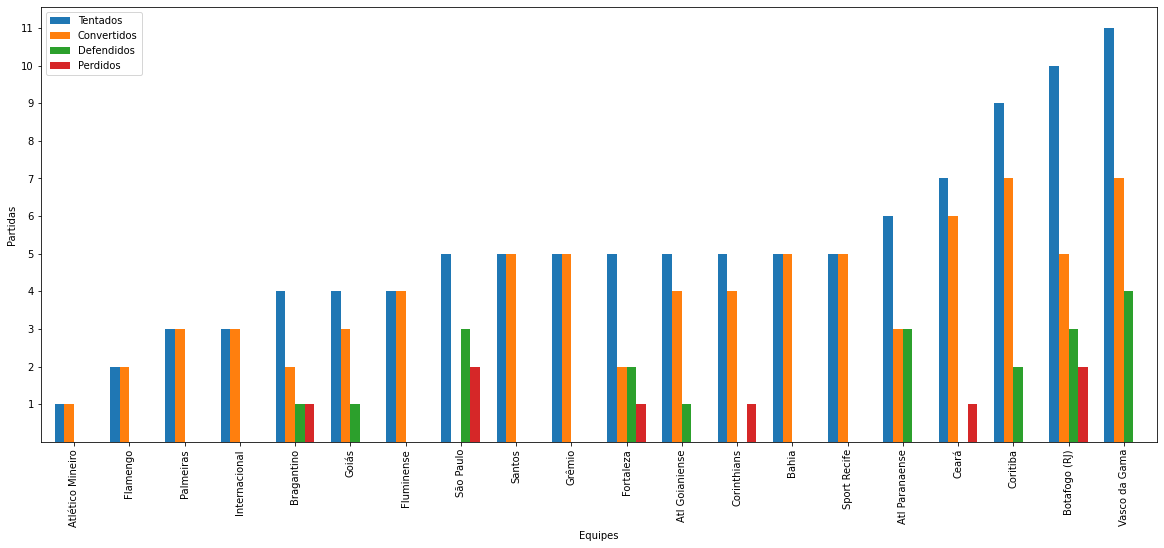

In [13]:
penaltis = df2[['Unnamed: 0_level_0', 'Penaltis']].sort_values(by=('Penaltis','PT'))

penaltis.plot(('Unnamed: 0_level_0', 'Equipe'), 'Penaltis', kind='bar', figsize=(20, 8), width=0.7)
plt.xticks(rotation='vertical')
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.xlabel('Equipes')
plt.ylabel('Partidas')
plt.legend(['Tentados', 'Convertidos', 'Defendidos', 'Perdidos'])
plt.show()

<h1>Comentário</h1>
<br>
As três equipes com maior número de penaltis sofridos são Vasco da Gama, Botafogo (RJ) e Coritiba, sendo que Vasco da Gama e Coritiba são os clubes com maior número de gols sofridos desta forma.
<br>
<br>
Já no caso das três equipes com menor número de penaltis sofridos são Atlético Mineiro, Flamengo e empatados em terceiro lugar, Palmeiras e Internacional. Todos eles sofreram gols em todas as tentativas.
<br>
<br>
Um caso curioso: O São Paulo sofreu 5 penalidades, porém <b>NENHUM</b> foi convertido. É a única equipe que não sofreu gols em penalidades até a rodada 27. Três foram defendidos por seu goleiro, no qual foi o único a atuar nas 27 partidas do campeonato brasileiro, e duas penalidades foram perdidas por seus adversários.

<h1>Análise do Desempenho</h1>
<br>
Focarei na parte de jogos sem a defesa ser vazada.

In [14]:
df1 = df1.sort_values(by='SV', ascending=False)

df1

,Equipe,# J,MP,Inícios,Min.,90s,GC,GC90,CaGC,Defesas,%Defesas,V,E,D,SV,%SV,PT,GPC,Psv,GPp
31,Fortaleza,2,27,27,2.430,27.0,25,93,107,85,785,7,10,10,10,370,5,2,2,1
37,São Paulo,1,27,27,2.430,27.0,23,85,93,73,753,16,8,3,10,370,5,0,3,2
34,Internacional,2,27,27,2.430,27.0,26,96,68,45,662,13,8,6,10,370,3,3,0,0
27,Corinthians,2,27,27,2.429,27.0,30,111,122,96,787,10,9,8,10,370,5,4,0,1
22,Atlético Mineiro,3,27,27,2.427,27.0,35,130,107,72,682,15,4,8,9,333,1,1,0,0
35,Palmeiras,2,26,26,2.340,26.0,25,96,92,69,761,12,8,6,9,346,3,3,0,0
33,Grêmio,2,26,26,2.340,26.0,22,85,75,57,773,11,12,3,9,346,5,5,0,0
21,Atl Paranaense,3,27,27,2.430,27.0,29,107,107,84,757,10,4,13,9,333,6,3,3,0
26,Ceará,2,27,27,2.430,27.0,38,141,121,89,736,9,9,9,8,296,7,6,0,1
20,Atl Goianiense,2,27,27,2.430,27.0,33,122,102,74,716,8,10,9,7,259,5,4,1,0


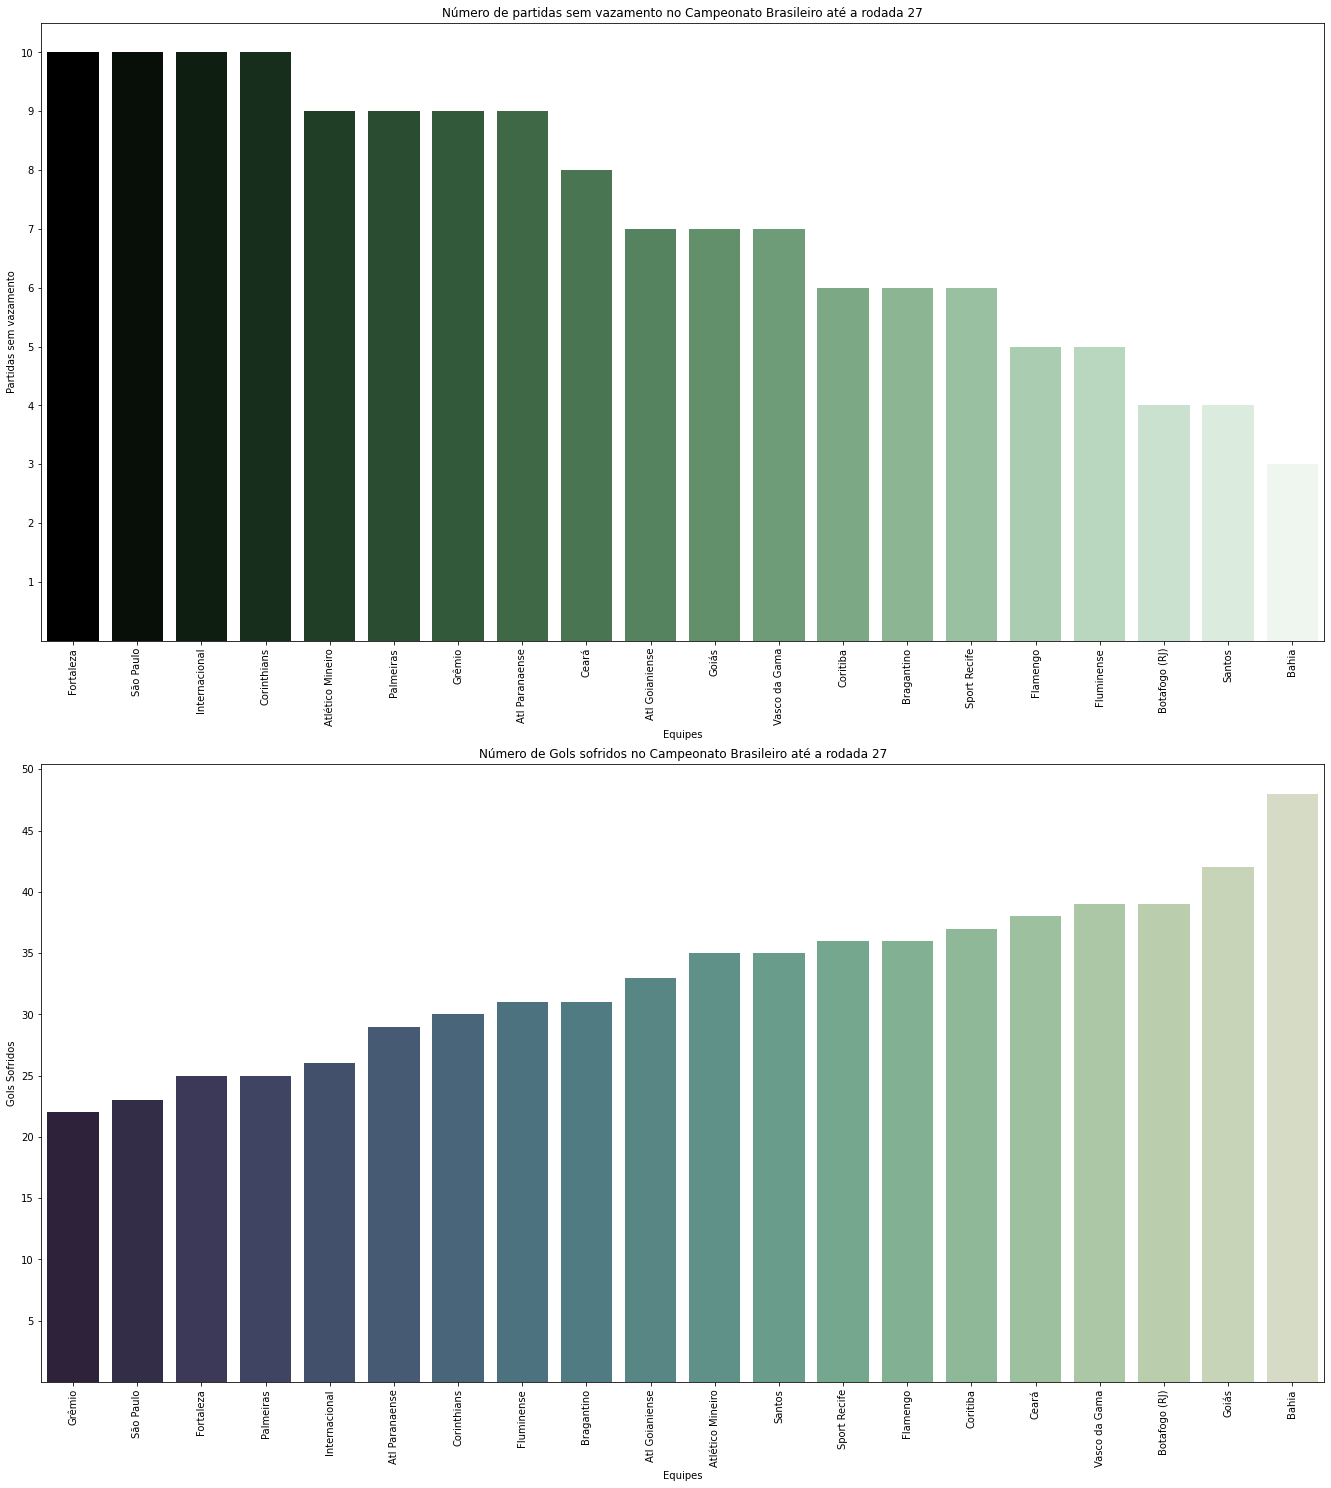

In [20]:
palette1 = sns.cubehelix_palette(20, start=2, rot=0, dark=0, light=.95, reverse=True)
palette2 = sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True)

plt.figure(figsize=(23,25))

plt.subplot(2, 1, 1)

sns.barplot(x='Equipe', y='SV', data=df1, palette=palette1)
plt.xticks(rotation='vertical')
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title('Número de partidas sem vazamento no Campeonato Brasileiro até a rodada 27')
plt.xlabel('Equipes')
plt.ylabel('Partidas sem vazamento')

df2 = df1.sort_values(by='GC')

plt.subplot(2, 1, 2)

sns.barplot(x='Equipe', y='GC', data=df2, palette=palette2)
plt.xticks(rotation='vertical')
plt.yticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.title('Número de Gols sofridos no Campeonato Brasileiro até a rodada 27')
plt.xlabel('Equipes')
plt.ylabel('Gols Sofridos')

plt.show()

<h1>Comentário</h1>
<br>
Nota-se que dentro dos times que obtiveram o maior número de partidas com suas defesas não vazadas, duas se encontram entre as 3 melhores defesas do campeonato brasileiro, que são São Paulo e Fortaleza. A melhor defesa do campeonato é a do Grêmio, que não foi vazada em 9 partidas e sofreu 22 gols no total.
<br>
<br>
<b>Um detalhe: O Grêmio possui um jogo a menos no campeonato em relação ao São Paulo (23 gols sofridos) e Fortaleza (25 gols sofridos), o que poderia mudar a configuração de melhor defesa do campeonato ou ainda em relação ao número de partidas sem que sua defesa fosse vazada.</b>

<h1>Conclusão</h1>
<br>
O objetivo deste projeto era na parte de Web Scraping, no qual foi concluído com sucesso. A análise foi apenas uma demonstração de que podemos extrair dados de forma simples da internet, limpá-los e fazer uma análise exploratória deles facilmente.